![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

##### Análisis del total de bicicletas rentadas por temporada

In [4]:
# Celda 1.1
# Calculo de la media por temporada
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

Tal como podemos observar la anterior celda nos muestra el total de rentas por season en promedio. Por tanto, podemos observar que las temporadas con mayores rentas de bicicletas en promedio son la 2 y la 3. En cuanta las temporadas con menores rentas de bicicletas en promedio corresponden a la 1 y la 4, siendo la temporada 1 como la que menor rentas de bicicletas ha tenido. 

In [5]:
# Calculo del valor maximo por temporada
print(bikes.groupby('season').total.max())
# Calculo del valor minimo por temporada
print(bikes.groupby('season').total.min())
# Calculo de los quantiles para cada temporada
print(bikes.groupby('season').total.quantile([0.25, 0.5, 0.75]))

season
1    801
2    873
3    977
4    948
Name: total, dtype: int64
season
1    1
2    1
3    1
4    1
Name: total, dtype: int64
season      
1       0.25     24.0
        0.50     78.0
        0.75    164.0
2       0.25     49.0
        0.50    172.0
        0.75    321.0
3       0.25     68.0
        0.50    195.0
        0.75    347.0
4       0.25     51.0
        0.50    161.0
        0.75    294.0
Name: total, dtype: float64


En la anterior celda se analizaron tanto los valores maximos, minimos y los cuartiles Q1, Q2, y Q3 para ver el comportamiento de los totales para cada una de las temporadas. De lo anterior podemos concluir:
* La temporada 3 es la temporada con la mayor cantidad de rentas de bicicletas reportadas con un total de 977, seguida de la temporada 4 con 948 rentas. 
* Todas las temporadas tienen como valor minimo 1 bicicleta rentada.
* En cuanto a los cuartiles es interesante observar el rango intercuartil (Q1- Q3) de cada una de las temporadas. Por ejemplo, podemos observar que los limites del rango intercuartil para la temporada 3 son mayores comparados con las otras 3 temporadas, lo cual coincide con que es la temporada que posee la mayor renta de bicicletas en promedio. En cuanto a la temporada con menor promedio ( temporada 1), podemos observar que los limites de su rango intercuartil son menores comparados con las de las otras temporadas.

##### Análisis del total de bicicletas rentadas por hora

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

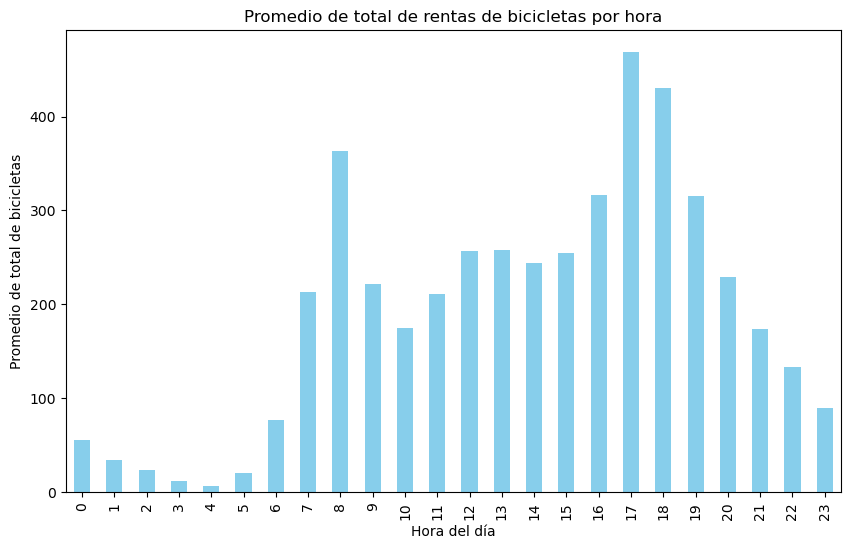

In [7]:
promedio_por_hora = bikes.groupby('hour').total.mean()

# Crear el histograma
promedio_por_hora.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Configurar el título y etiquetas de los ejes
plt.title('Promedio de total de rentas de bicicletas por hora')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de total de bicicletas')

# Mostrar el histograma
plt.show()

Como es mas complejo comparar todos los valores en promedio por cada hora ya que son 24 valores, se opto por realizar un histograma con el fin de poder hacer un análisis con mayor claridad basandonos en la visualización. Del anterior histograma podemos concluir lo siguiente:
* En promedio las horas de la madrugada, son las horas en las que ocurren la menor cantidad de rentas de bicicleta, especificamente ente las 0 y las 5. 
* A partir de las 6 de la mañana empieza a ocurrir un aumento en la renta de bicicletas alcanzando un valor pico a las 8 de la mañana, hora en la que la renta vuelve a disminuir hasta las 10. 
* Entre las 11 y las 15 las rentas de bicicletas en promedio no cambian, manteniendose entre un rango de 200 - 250 bicicletas rentadas aproximadamente. 
* A partir de las 16 empiezan a tener un incremento hasta que alcanzan un nuevo pico a las 17, en el cual empieza a disminuir cada vez mas a medida que cae la noche hasta llegar a las 23.
* Si se hace un acercamiento a la vida real esas horas en las que se alcanzan "picos" pueden estar relacionadas a las horas en las que las personas entran a trabajar y salen de trabajar, siendo estas las horas en las que se incrementan las necesidades de transporte de las personas.

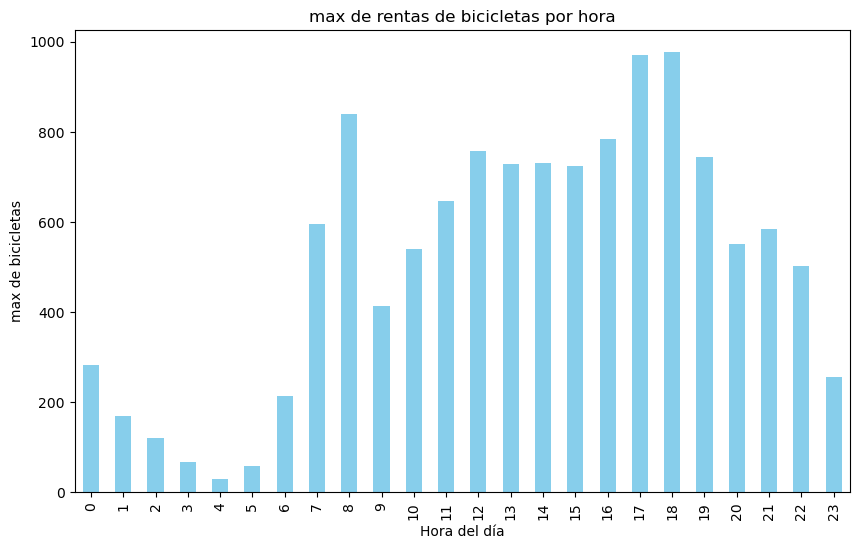

In [8]:
# Se evalua los valores maximos
max_por_hora = bikes.groupby('hour').total.max()

# Crear el histograma
max_por_hora.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Configurar el título y etiquetas de los ejes
plt.title('max de rentas de bicicletas por hora')
plt.xlabel('Hora del día')
plt.ylabel('max de bicicletas')

# Mostrar el histograma
plt.show()

Si analizamos los valores maximos de rentas por hora, podemos encontrar que las horas con valores mas altos corresponden de igual forma a las horas en los que su promedio de rentas era alto. Estas horas son las mismas horas que llamamos "picos" en la anterior visualización.  

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

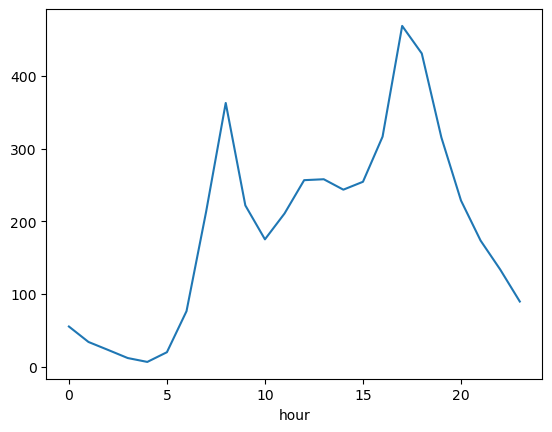

In [9]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

Para esta grafica podemos concluir lo mismo que se hizo para el histograma realizado para la cantidad de rentas promedio por cada hora del dia. En conclusión: 
* En promedio las horas de la madrugada, son las horas en las que ocurren la menor cantidad de rentas de bicicletas.
* Se tienen dos valores picos los cuales son a las 8 y las 17.
* en el transcurso de la mañana (desde las 11) hasta aproximadamente las 15 la renta de bicicletas en promedio se mantiene en un rango entre las 200 y 250 bicicletas.
* a mediados de que transcurre la noche la renta de bicicletas empieza a disminuir considerablemente, sobre todo en las últimas horas del dia. 

##### Visualización para season = 1 "Invierno"

hour
0      28.292035
1      18.761062
2      13.205607
3       7.760417
4       3.336634
5      10.300000
6      42.725664
7     124.433628
8     253.345133
9     154.442478
10    102.168142
11    122.601770
12    154.412281
13    160.771930
14    151.263158
15    159.087719
16    188.640351
17    283.456140
18    258.157895
19    176.315789
20    124.394737
21     95.298246
22     72.912281
23     45.333333
Name: total, dtype: float64


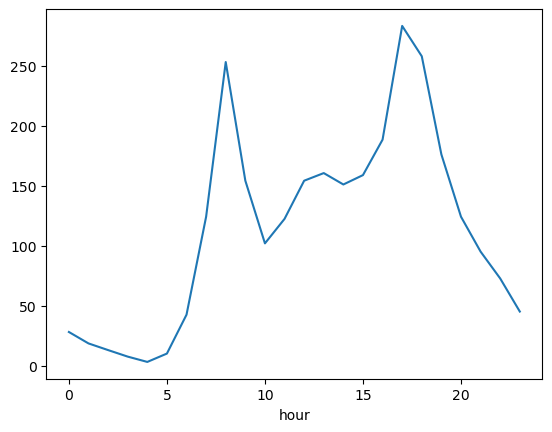

In [10]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
# primero creamos un nuevo dataframe que solo tenga los valores de la temporada 1 , filtrando el dataset original
season_1 = bikes[bikes["season"]==1]
season_1.groupby("hour").total.mean().plot()
print(season_1.groupby("hour").total.mean())

En esta gráfica, se pueden observar las mismas tendencias que en el anterior caso, la diferencia radica es que existe una disminución en la renta de bicicletas en todas las horas. Esto se podria deber a que las personas en invierno puede que opten por otros medios de transporte diferentes a la bicicleta debido a las limitaciones generadas por las condiciones climaticas. Esto se puede ver claramente en los valores de los picos donde a las 8 alcanza un valor de 253,34 y a las 17 de 283,45, lo que indica una disminución en la renta de bicicletas si comparamos estos valores con los valores que se obtuvieron en esas horas cuando se realizo el análisis con todas las "season" donde se obtuvo para las 8 - 362 y para las 17 - 468

##### Visualización para season = 3 "Verano"

hour
0      75.675439
1      44.831858
2      31.707965
3      15.778761
4       8.087719
5      25.728070
6      96.780702
7     264.035088
8     403.508772
9     250.710526
10    218.535088
11    256.877193
12    307.017544
13    304.421053
14    286.350877
15    294.956140
16    371.324561
17    565.385965
18    539.070175
19    413.500000
20    307.842105
21    236.017544
22    180.789474
23    121.719298
Name: total, dtype: float64


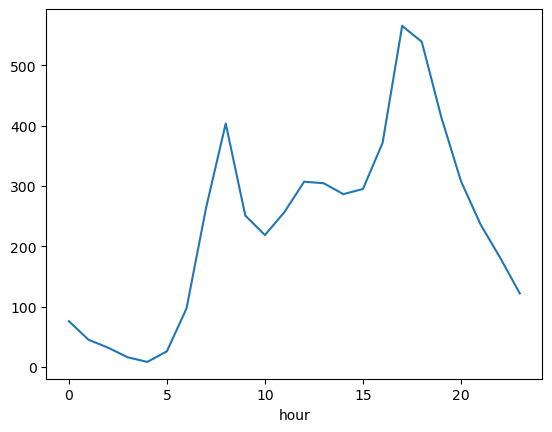

In [11]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
# primero creamos un nuevo dataframe que solo tenga los valores de la temporada 3 , filtrando el dataset original
season_3 = bikes[bikes["season"]==3]
season_3.groupby("hour").total.mean().plot()
print(season_3.groupby("hour").total.mean())


La tendencia para este caso en el comportamiento de la renta de bicletas en promedio es igual que en los anteriores dos casos. Lo unico que lo diferencia es que en esta temporada incrementan significativamente la cantidad de bicicletas rentadas en promedio, lo cual se puede ver en cada uno de los picos, alcanzando un valor de 403 bicicletas rentadas para las 8 y de 565 bicicletas rentadas para las 17

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [12]:
# Se crean columnas dummys para cada categoria de la variable season.
data = pd.get_dummies(bikes, columns=['season'], drop_first=True)
data

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,0,0,0
2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0,0,0
2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,0,0,0
2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,0,0,0
2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,0,0,1
2012-12-19 20:00:00,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,0,0,1
2012-12-19 21:00:00,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,0,0,1


In [13]:
# Celda 3
# definimos el dataframe a utilizar.
data = data.reset_index()
data= data[["total","season_2","season_3", "season_4", "hour"]]
data

X = data[["season_2","season_3", "season_4","hour"]]
Y = data["total"]


# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo al conjunto con todos los datos sin partir la muestra
model.fit(X, Y)

print("Coeficientes:")
for i, coef in enumerate(model.coef_):
    print(f"Coeficiente para '{X.columns[i]}': {coef}")

print(f"Intercepto: {model.intercept_}")

Coeficientes:
Coeficiente para 'season_2': 100.31723191606106
Coeficiente para 'season_3': 119.46754994593172
Coeficiente para 'season_4': 84.08311787296938
Coeficiente para 'hour': 10.545206094069906
Intercepto: -6.430262462305308


* El coeficiente para 'season_2' es aproximadamente 100.32. De esto se concluye que en comparación con la season 1, se espera que el valor total aumente en aproximadamente 100.32 unidades cuando la observación pertenece a la temporada 2.

* El coeficiente para 'season_3' es aproximadamente 119.47. De esto se concluye que en comparación con la season 1 (categoría de referencia), se espera que el valor total aumente en aproximadamente 119.47 unidades cuando la observación pertenece a la temporada 3.

* El coeficiente para 'season_4' es aproximadamente 84.08. De esto se concluye que en comparación con la season 1, se espera que el valor total aumente en aproximadamente 84.08 unidades cuando la observación pertenece a la temporada 4.

* El coeficiente para 'hour' es aproximadamente 10.55. Esto significa que, manteniendo constantes las otras variables (season), se espera que el valor total aumente en aproximadamente 10.55 unidades por cada unidad adicional en la variable 'hour'.

Si se trata de interpretar el valor de los coeficientes haciendo una aproximación a lo que encontramos en las visualizaciónes de los datos, tenemos que el coeficiente de la temporada 3 que corresponde al verano es el mayor comparado con las otras temporadas, lo cual es acorde a lo que se encontro, donde para el verano se tenia los valores mas altos en promedio del total de bicicletas rentadas. Los coeficientes para las season 2 y 4 tambien coinciden con los resultados de los promedios del total de bicicletas rentadas, donde la temporada 2 es la segunda con mas rentas en promedio y la temporada 3 la tercera.

Las limitaciones que tiene la regresión lineal en este caso son:
* Asume que existe una relación lineal entre la variable de respuesta y las variables predictoras, por tanto no esta capturando relaciones no lineales.
* No permite una interpretación clara y certera, sobre todo para la variable de horas lo cual no estaria acorde a lo que ocurre en realidad. Por ejemplo, el coeficiente obtenido es de 10.54, si una observación tiene como hora 8 el aporte de multiplicar ese valor por su coeficiente va a ser menor que multiplicar por ejemplo la hora 23 por ese mismo, lo cual no es consecuente con la realidad ya que en promedio en la hora 8 se presentan muchas mas rentas de bicicletas totales que en la hora 23 para todas las temporadas. Esto también puede suceder porque es posible que no exista una relación lineal entre la variable hora y la variable total.



### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [33]:
# Esta función se usara para calcular el mse en cada nodo
def calcular_mse(y):
    n = len(y)
    mean_y = np.mean(y)
    mse = np.mean((y - mean_y)**2)
    return mse
# Esta función evalua el mse para el nodo, teniendo en cuenta el valor de la partición. 
def evaluar_nodo(X, y, idx, valor_corte):
    left_indices = np.where(X[:, idx] <= valor_corte)[0]
    right_indices = np.where(X[:, idx] > valor_corte)[0]
    
    left_mse = calcular_mse(y[left_indices])
    right_mse = calcular_mse(y[right_indices])
    
    return left_mse, right_mse
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, float('inf')]  # j, split, mse
    
    # Para todas las variables 
    for j in features:
        # Comprobar si hay suficientes datos en la serie
        if len(X.iloc[:, j]) == 0:
            continue
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            # Calcula el mse para la particion derecha y izquierda
            mse_left, mse_right = evaluar_nodo(X.values, y.values, j, split)
            
            # Calcula el mse ponderado para la division de un nodo
            mse = (len(y[y <= split]) * mse_left + len(y[y > split]) * mse_right) / len(y)
            
            #  Asigna el mejor split, basandose en el que menor mse tenga            
            if mse < best_split[2]:
                best_split = [j, split, mse]
    
    return best_split



In [34]:
# Celda 4
# Primero se tratara la variable categorica "season"
datos_arbol= bikes.reset_index()


In [35]:
X_arbol = datos_arbol[["season", "hour"]]
Y_arbol = datos_arbol["total"]

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None

In [36]:
best_split(X_arbol, Y_arbol, 10)

[1, 21.0, 9617.974042440874]

In [37]:
def tree_grow(X, y, level=0, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, mse=0)
        return tree
    
    # Calcular la mejor división
    j, split, mse = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean() 
    #y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], mse=mse)
    
    # Criterio de parada: alcanzar el número deseado de nodos finales
    if level == max_depth:
        return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, max_depth=max_depth, num_pct=num_pct)
    
    return tree


In [38]:
tree_grow(X_arbol, Y_arbol, level=0,max_depth=3,num_pct=5)

{'y_pred': 191.57413191254824,
 'level': 0,
 'split': [1, 20.0],
 'n_samples': 10886,
 'mse': 11330.408548882857,
 'sl': {'y_pred': 198.6854998896491,
  'level': 1,
  'split': [1, 6.0],
  'n_samples': 9062,
  'mse': 30682.717281236517,
  'sl': {'y_pred': 25.177719821162444,
   'level': 2,
   'split': [1, 2.0],
   'n_samples': 2684,
   'mse': 251.38584703725883,
   'sl': {'y_pred': 44.51045104510451,
    'level': 3,
    'split': -1,
    'n_samples': 909,
    'mse': 1750.4052518690899},
   'sr': {'y_pred': 15.27718309859155,
    'level': 3,
    'split': -1,
    'n_samples': 1775,
    'mse': 196.7339244586522}},
  'sr': {'y_pred': 271.7013170272813,
   'level': 2,
   'split': [0, 3.0],
   'n_samples': 6378,
   'mse': 30737.979448375765,
   'sl': {'y_pred': 236.39736346516008,
    'level': 3,
    'split': -1,
    'n_samples': 3186,
    'mse': 30549.78766460148},
   'sr': {'y_pred': 306.93890977443607,
    'level': 3,
    'split': -1,
    'n_samples': 3192,
    'mse': 29932.456462962706}}},

In [39]:
# Se parte la muestra
X_train, X_test, y_train, y_test = train_test_split(X_arbol, Y_arbol, test_size=0.3, random_state=42)

In [40]:
tree= tree_grow(X_train, y_train, level=0,max_depth=5,num_pct=10)
tree

{'y_pred': 191.37034120734907,
 'level': 0,
 'split': [1, 21.0],
 'n_samples': 7620,
 'mse': 9779.799134016734,
 'sl': {'y_pred': 199.99295352323838,
  'level': 1,
  'split': [1, 19.0],
  'n_samples': 6670,
  'mse': 18134.405271958556,
  'sl': {'y_pred': 192.25648653115186,
   'level': 2,
   'split': [1, 8.0],
   'n_samples': 6051,
   'mse': 30934.555982005448,
   'sl': {'y_pred': 54.60392156862745,
    'level': 3,
    'split': [0, 3.0],
    'n_samples': 2550,
    'mse': 8714.25755529411,
    'sl': {'y_pred': 44.156,
     'level': 4,
     'split': [1, 1.0],
     'n_samples': 1250,
     'mse': 6865.668236146174,
     'sl': {'y_pred': 42.176829268292686,
      'level': 5,
      'split': -1,
      'n_samples': 164,
      'mse': inf},
     'sr': {'y_pred': 44.4548802946593,
      'level': 5,
      'split': -1,
      'n_samples': 1086,
      'mse': 7463.832949775382}},
    'sr': {'y_pred': 64.65,
     'level': 4,
     'split': [1, 1.0],
     'n_samples': 1300,
     'mse': 11868.313324151362

In [41]:
### Esta función permite realizar las predicciones para el arbol entrenado. 
def tree_predict(X, tree):
    predicted = np.zeros(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        predicted += tree['y_pred']
    else:
        j, split = tree['split']
        filter_l = X.iloc[:, j] < split
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])
        elif X_r.shape[0] == 0:  
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])

    return predicted



In [42]:
# Se realizan las predicciones en la muestra de test y  se calcula el mse.
predicciones = tree_predict(X_test, tree)
mse_val = mean_squared_error(y_test, predicciones)
print("MSE evaluado en Test:", mse_val)

MSE evaluado en Test: 20740.889220761343


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

##### predicciones punto 3 Modelo de regresion

In [43]:
# Inicializar el modelo de regresión lineal
linear_model = LinearRegression()

# Ajustar el modelo al conjunto con todos los datos sin partir la muestra
linear_model.fit(X_train, y_train)
# ahora se realiza las predicciones en la muestra de test
y_pred = linear_model.predict(X_test)
# Calcular el error cuadrático medio en el conjunto de test
mse_val = mean_squared_error(y_test, y_pred)
print("MSE evaluado en Test:", mse_val)

MSE evaluado en Test: 27062.11039530083


##### Predicciones arbol de decisión calibrando el max_depth

In [44]:
# Celda 5
# Se calibrara el parametro de maxima profundidad
tree_regressor=[]
entrenados= []
predicciones = []
mse=[]
for i in range(2, 15):
    tree_regressor.append(DecisionTreeRegressor(max_depth=(i), min_samples_split=5, random_state=42))
    entrenados.append(tree_regressor[i-2].fit(X_train, y_train))
    predicciones.append(tree_regressor[i-2].predict(X_test))
    mse.append(mean_squared_error(y_test, predicciones[i-2]))
# Se crea un diccionario que guarda el modelo con el max_depth seleccionado y el mse obtenido en la muestra de test
dicti={}
for k in range(2, 15):
    dicti[k] = mse[k-2]
print("Mse por cada Max Dept")
dicti

Mse por cada Max Dept


{2: 20390.75293880017,
 3: 18096.321227594133,
 4: 16432.068667581527,
 5: 15300.901195560124,
 6: 14050.398617365507,
 7: 13870.786495571638,
 8: 13778.901714498801,
 9: 13782.963350884856,
 10: 13780.511769552142,
 11: 13776.897591163506,
 12: 13776.897591163506,
 13: 13776.897591163506,
 14: 13776.897591163506}

Entrenando el modelo con diferentes valores para el parametro de "max_depth", se encontro que el "max_depth" que reduce en gran medida el MSE obtenido sin aumentar considerablemente la complejidad del modelo es utilizar un arbol de decisión con maxima produndidad de 7.

Comparando el resultado del modelo de arbol de decisión con los resultados del modelo de regresión lineal, podemos determinar que el arbol de decisión tiene un mejor desempeño en la predicción del total de bicicletas rentadas utilizando unicamente como predictoras las variables de season y hour. Esto se puede concluir al comparar los valores obtenidos por la metrica del MSE, donde el arbol de decisión obtuvo un MSE de 13870.78 contra un MSE de 27062.110 que obtuvo el modelo de regresión lineal. A pesar de que el modelo de arbol de decisión obtuvo un mejor desempeño, no quiere decir que sea un buen modelo ya que obtuvo un MSE que es alto, sin embargo, se podrian incurrir en mejoras del modelo para obtener un mejor resultado tal como puede ser incluir nuevos predictores en el modelo, ya que se utilizaron unicamente 2. Otro método que se podria intentar seria ajustar otros parametros del arbol de decisión aparte del que se ajusto para este modelo.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [45]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [46]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [48]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

#### Modelo para el arbol de decisión

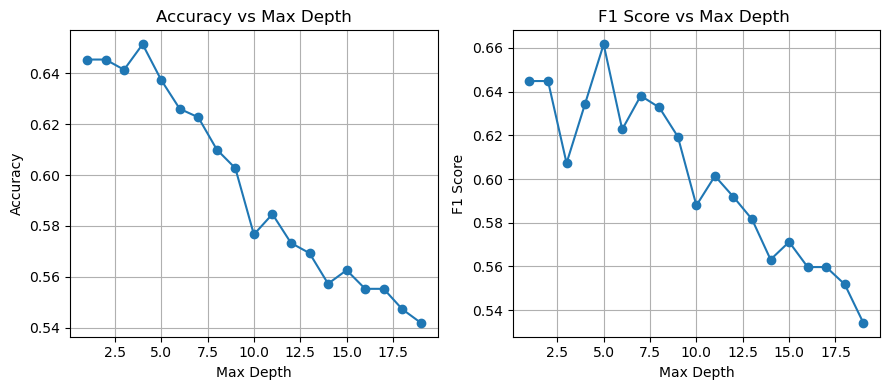

In [79]:
# Crear y entrenar el modelo de árbol de decisión calibrando el max_depth
accuracy=[]
F1= []
for i in range(1,20):
    tree_model = DecisionTreeClassifier(max_depth=i, random_state=1)
    tree_model.fit(X_train, y_train)
    prediccion = tree_model.predict(X_test)
    accuracy.append(accuracy_score(y_test, prediccion))
    F1.append(f1_score(y_test, prediccion))

max_depth= range(1,20)
accuracy
F1
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

# Gráfico para Accuracy
ax[0].plot(max_depth, accuracy, marker='o')
ax[0].set_xlabel('Max Depth')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy vs Max Depth')
ax[0].grid(True)

# Gráfico para F1 Score
ax[1].plot(max_depth, F1, marker='o')
ax[1].set_xlabel('Max Depth')
ax[1].set_ylabel('F1 Score')
ax[1].set_title('F1 Score vs Max Depth ')
ax[1].grid(True)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


In [81]:
# El modelo con mejores resultados es el que tiene un max Depth de 5.
print("Accuracy del modelo con max Depth 5:" + str(accuracy[4]))
print("F1-Score del modelo con max Depth 5:" + str(F1[4]))

Accuracy del modelo con max Depth 5:0.6373333333333333
F1-Score del modelo con max Depth 5:0.6616915422885572


Calibrando el arbol de decisión con el max depth, se encontro que el arbol que produce los mejores resultado tanto para el accuracy como para el F1-Score es el de maxima profundidad de 5. Esto se pudo concluir comparando los graficos en el cual al seleccionar el valor de 5 se obtienen buenos resultados para ambas metricas.

##### Modelo para Regresión Logística

In [82]:
# Crear y entrenar el modelo de regresión logística
logistica = LogisticRegression()
logistica.fit(X_train, y_train)

# Predecir en el conjunto de prueba y evaluar el desempeño
prediccion_l = logistica.predict(X_test)
logistica_accuracy = accuracy_score(y_test, prediccion_l)
logistica_f1 = f1_score(y_test, prediccion_l)
print("\nDesempeño del modelo de Regresión Logística:")
print("Accuracy:", logistica_accuracy)
print("F1-Score:", logistica_f1)


Desempeño del modelo de Regresión Logística:
Accuracy: 0.614
F1-Score: 0.6111484217595702


Conclusiones: 
* El modelo de árbol de decisión supera por poco al modelo de regresión logística tanto en accuracy como en F1-Score. Lo cual sugiere que el árbol de decisión es un poco mejor en la clasificación de las noticias como populares o no populares en comparación con la regresión logística.
* Si no se calibrara el parametro del max_depth, el modelo de regresión logistica podria llegar a tener mejores resultados si nos basamos en las metricas de accuracy y F1-Score.
* Considero importante visualizar otras metricas para modelos de clasificación con el fin de poder analizar con mayor claridad como esta clasificando los modelos, cuales son sus ventajas en cuanto a la detección de verdaderos positivos y negativos, y como se comportan sus errores.


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

#### 100 arboles de decisión con max_depth de 4



In [98]:
bagreg_max_depth = BaggingClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)
# Entrenemiento del modelo con set de entrenamiento y predicción en el set de test
bagreg_max_depth.fit(X_train, y_train)
y_pred_max = bagreg_max_depth.predict(X_test)
y_pred_max
arbol_max_depth_accuracy = accuracy_score(y_test, y_pred_max)
arbol_max_depth_f1 = f1_score(y_test, y_pred_max)
print("Accuracy Arbol Max_depth = 4:" + str( arbol_max_depth_accuracy))
print("F1-Score Arbol Max_depth = 4:" + str( arbol_max_depth_f1))

Accuracy Arbol Max_depth = 4:0.6546666666666666
F1-Score Arbol Max_depth = 4:0.6518817204301075


#### 100 arboles de decisión con min_samples_leaf de 5

In [99]:
bagreg_min_samples = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=5), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)
# Entrenemiento del modelo con set de entrenamiento y predicción en el set de test
bagreg_min_samples.fit(X_train, y_train)
y_pred_min = bagreg_min_samples.predict(X_test)

arbol_min_samples_accuracy = accuracy_score(y_test, y_pred_min)
arbol_min_samples_f1 = f1_score(y_test, y_pred_min)
print("Accuracy Arbol Max_depth = 4:" + str( arbol_min_samples_accuracy))
print("F1-Score Arbol Max_depth = 4:" + str( arbol_min_samples_f1))

Accuracy Arbol Max_depth = 4:0.6446666666666667
F1-Score Arbol Max_depth = 4:0.6458471760797342


#### 100 regresiones logisticas

In [100]:
log_reg_clf = BaggingClassifier(LogisticRegression(), n_estimators=100, random_state=1)
log_reg_clf.fit(X_train,y_train)
y_pred_log = log_reg_clf.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
print("Accuracy regresión logistica:" + str( log_accuracy))
print("F1-Score regresión logistica:" + str( log_f1))

Accuracy regresión logistica:0.62
F1-Score regresión logistica:0.6159029649595688


#### Ensamblaje por votación Mayoritaria

In [122]:
# la función moda servira para calcular el dato que mas se repite por "fila", es decir de las predicciones de los tres modelos escogera 1 si es el dato que mas aparece o cero de lo contrario
from scipy.stats import mode
# como tenemos las predicciones de los tres modelos, se procede a calcular la votación mayoritaria. 
predicciones = [y_pred_max,y_pred_min, y_pred_log]

# Calcular la moda de las predicciones
votacion_mayoritaria= mode(predicciones ,axis=0)
moda = votacion_mayoritaria.mode

# Calcular accuracy y F1-Score
accuracy = accuracy_score(y_test, moda)
f1 = f1_score(y_test, moda)

print(accuracy)
print(f1)

0.654
0.652377762893503


#### Ensamblaje por votación mayoritaria Manual


In [37]:
# Creación de 300 muestras de bootstrap
n_estimators = 300
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]
len(samples)

300

In [38]:
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

modelos = {}
for i in range(n_estimators):
    if i < 100:
        modelos[i] = DecisionTreeClassifier(max_depth= 4)
        modelos[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    if i <200 and i >=100:
        modelos[i] = DecisionTreeClassifier(min_samples_leaf=5)
        modelos[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    if i<300 and i >=200:
        modelos[i] = LogisticRegression()
        modelos[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
# Diccionario con los 300 modelos entrenados            
modelos       

{0: DecisionTreeClassifier(max_depth=4),
 1: DecisionTreeClassifier(max_depth=4),
 2: DecisionTreeClassifier(max_depth=4),
 3: DecisionTreeClassifier(max_depth=4),
 4: DecisionTreeClassifier(max_depth=4),
 5: DecisionTreeClassifier(max_depth=4),
 6: DecisionTreeClassifier(max_depth=4),
 7: DecisionTreeClassifier(max_depth=4),
 8: DecisionTreeClassifier(max_depth=4),
 9: DecisionTreeClassifier(max_depth=4),
 10: DecisionTreeClassifier(max_depth=4),
 11: DecisionTreeClassifier(max_depth=4),
 12: DecisionTreeClassifier(max_depth=4),
 13: DecisionTreeClassifier(max_depth=4),
 14: DecisionTreeClassifier(max_depth=4),
 15: DecisionTreeClassifier(max_depth=4),
 16: DecisionTreeClassifier(max_depth=4),
 17: DecisionTreeClassifier(max_depth=4),
 18: DecisionTreeClassifier(max_depth=4),
 19: DecisionTreeClassifier(max_depth=4),
 20: DecisionTreeClassifier(max_depth=4),
 21: DecisionTreeClassifier(max_depth=4),
 22: DecisionTreeClassifier(max_depth=4),
 23: DecisionTreeClassifier(max_depth=4),
 2

In [40]:
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = modelos[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,0,...,0,1,1,0,1,1,0,0,0,0
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
y_pred_df.sum(axis=1)

1483    276
2185    208
2520    248
3721    261
3727     32
       ... 
3077    101
5166     47
2227    228
5684     65
1937     34
Length: 1500, dtype: int64

In [43]:
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2))
# Desempeño al hacer votación mayoritaria
from sklearn import metrics
metrics.f1_score(y_pred, y_test)

0.623641304347826

In [44]:
# Desempeño al hacer votación mayoritaria
metrics.accuracy_score(y_pred, y_test)

0.6306666666666667

#### Conclusiones

* Al hacer el ensamble de los 3 modelos se obtuvo un mejor resultado para las metricas de accuracy y F1-score que para los modelos de regresión logistica y de arboles de decision con min samples, pero se obtuvieron resultados muy similares a los de arbol de decisión con max_depth. La unica desventaja de hacerlo de esa manera es la forma en que se hace la votación mayoritaria ya que finalmente solo esta tomando la votación de 3 modelos lo cual puede ser algo sesgado, cuando cada modelo por si solo es un ensamble de 100 modelos.
* Al hacer el ensamble de los 300 modelos de manera manual, se obtuvieron resultados un poco mejores en comparación del modelo de regresión lineal. Sin embargo, no se obtuvieron mejores resultados en comparación de los modelos de arbol de decisión, ni con el algoritmo de votación mayoritaria con el ensamble de los 3 modelos. 
* De este ejercicio podemos concluir que el ensamblaje por votación mayoritaria puede proporcionar una oportunidad de mejora en los modelos, que puede llevar a tener un mejor rendimiento predictivo.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [45]:
# Celda 8

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))
len(samples)

300

In [46]:
# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = modelos[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

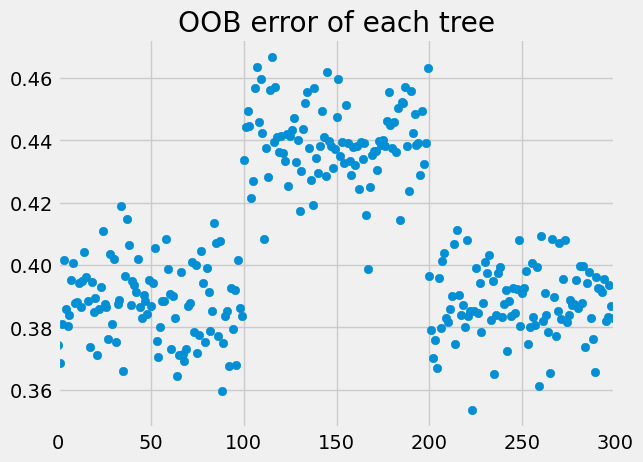

In [47]:
# Visualización de OOB para cada modelo
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

El modelo de arbol de decisión con min_samples_leaf es el que tiene errores mayores comparados con los otros dos modelos.

In [50]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

In [51]:
# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

1483    0.924428
2185    0.695992
2520    0.835226
3721    0.875265
3727    0.102009
4524    0.739467
234     0.064295
4735    0.157055
5839    0.445583
2939    0.695266
3053    0.867269
867     0.828780
276     0.864601
5798    0.098653
3512    0.940054
5789    0.067343
3198    0.833845
5908    0.934065
5718    0.201228
2687    0.068001
dtype: float64

In [53]:
# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6208304969366917, 0.6286666666666667)

Al ejecutar la votación ponderada se obtuvo un F1-Score de 0.62083 y un Accuracy de 0.628666, rendimientos muy similares a los obtenidos por el método de ensamblaje por votación mayoritaria. De igual manera, este modelo no se mostro superior al modelo de arbol de decisión con max_depth de 5. Creeria que para tener mejores resultados se podria calibrar los parametros de cada uno de los modelos. En resumen, lo que los resultados nos demuestra es que al parecer los modelos estan prediciendo de una manera muy similar, por tanto al hacer el ensamblaje puede que no se hallan obtenido mejores resultados porque lo que aprende un modelo del otro puede ser muy poco y por tanto se siguen obteniendo resultados muy similares.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

#### Conclusiones y análisis de resultados.
* El modelo por votación mayoritaria y por votación ponderada obtienen resultados que son muy similares y practicamente no aportaron en la mejora de las metricas del Accuracy y el F1-Score de manera significativa.
* Las ventajas y desventajas del modelo por votación mayoritaria dependen de la cantidad de modelos que se usaran, ya que si esta cantidad de modelos es alta, la votación mayoritaria es menos sesgada a medida de que tan grande sea la cantidad de votos por la clase positiva, pero en el caso de usar pocos modelos por ejemplo 3, puede llegar a ser sesgada o se puede tener una mayor probabilidad de clasificar la clase incorrectamente. Un ejemplo de esta desventaja esta en el ensamble realizado con los 3 modelos con 100 muestras de boostrap.
* Los resultados similares en los métodos de ensamblaje se deben principalmente a que los modelos base tienen unos rendimientos similares, por ello no se pudo ver una mejora significativa en las predicciones.
* En cuanto al método de votación ponderada tiene como ventaja que asigna los pesos segun el rendimiento de los modelos. Por tanto un modelo con buen rendimiento tendra un mayor peso en el ensamblaje. Sin embargo, se debe tener en cuenta como asignar esos pesos, ya que una mala asignación afectaria el rendimiento del modelo de ensamblaje, por tanto es importante calibrar la asignación de estos valores.